# Exercises SVM

Martijn Vermeulen, s1129901

### Exercise 1
---
Use the sklearn `make_blobs()` function, in the same way that we used in the lesson, to generate a *non linearly separable* dataset with 2 features.  
Fit a linear SVM to the dataset many times, varying the slack hyperparameter $C$, and calculate the model performance in classifying the data.  
What is, approximately, a the best value of the $C$ hyperparameter for this dataset?

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn import svm
import numpy as np
import pickle
import seaborn as sns
import sys
import os
sys.path.append(os.path.abspath("code"))
from utils import download_data
import warnings
warnings.filterwarnings('ignore')

sns.set_theme(context='notebook',style='white',font_scale=1.5,
              rc = {'axes.spines.top':False,'axes.spines.right':False})

In [2]:
#download lesson data
download_data('https://surfdrive.surf.nl/files/index.php/s/tEenLK693lU9v01')

In [3]:
#Make two non-sperable blobs
X_nsep,y_nsep = make_blobs(n_samples=50,n_features =2,centers=[[-1,0.5],[1,0]],cluster_std=1.5)

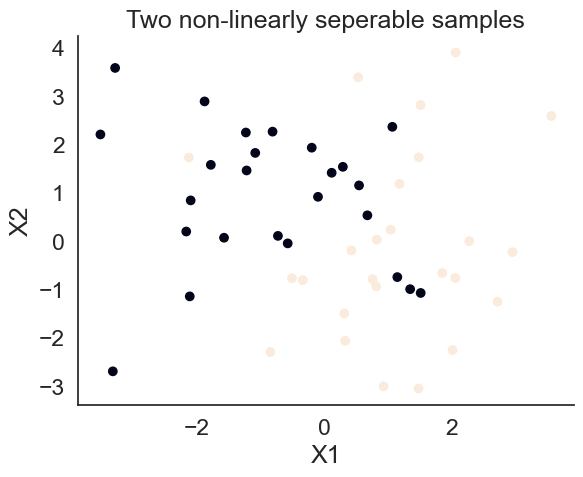

In [4]:
plt.title('Two non-linearly seperable samples')
plt.xlabel('X1')
plt.ylabel('X2')
plt.scatter(X_nsep[:,0], X_nsep[:,1], c = y_nsep)

0.82


Text(0, 0.5, 'X2')

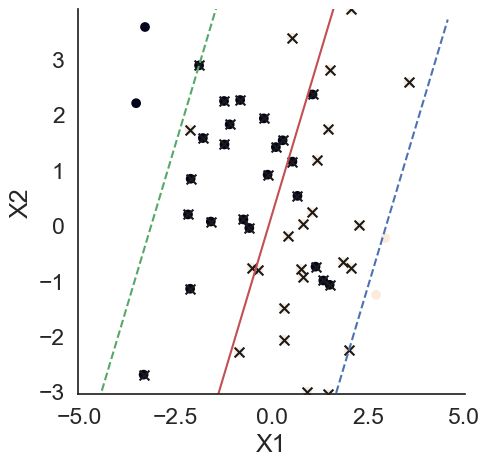

In [5]:
plt.figure(figsize=(5,5))
X,y = X_nsep,y_nsep
svc_model = svm.SVC(kernel='linear',C=0.01);
svc_model.fit(X, y)
score  = svc_model.score(X,y)
print(score)


plt.scatter(X[:,0],X[:,1],c=y_nsep)
# Constructing a hyperplane using a formula.
w = svc_model.coef_[0]           # w consists of 2 elements
b = svc_model.intercept_[0]      # b consists of 1 element
x_points = np.linspace(-2,2)    # generating x-points from -1 to 1
y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points
# Plotting a red hyperplane
plt.plot(x_points, y_points, c='r');
# Encircle support vectors
plt.scatter(svc_model.support_vectors_[:, 0],
            svc_model.support_vectors_[:, 1], 
            s=50, 
            c='k',
            marker='x');
# Step 2 (unit-vector):
w_hat = svc_model.coef_[0] / (np.sqrt(np.sum(svc_model.coef_[0] ** 2)))
# Step 3 (margin):
margin = 1 / np.sqrt(np.sum(svc_model.coef_[0] ** 2))
# Step 4 (calculate points of the margin lines):
decision_boundary_points = np.array(list(zip(x_points, y_points)))
points_of_line_above = decision_boundary_points + w_hat * margin
points_of_line_below = decision_boundary_points - w_hat * margin
# Plot margin lines
# Blue margin line above
plt.plot(points_of_line_above[:, 0], 
         points_of_line_above[:, 1], 
         'b--')
# Green margin line below
plt.plot(points_of_line_below[:, 0], 
         points_of_line_below[:, 1], 
         'g--')

plt.ylim([min(X[:,1]),max(X[:,1])])

plt.xlabel('X1')
plt.ylabel('X2')

In [23]:
from sklearn.model_selection import StratifiedKFold
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#X_train,y_train = X_nsep,y_nsep
#X_test,y_test = X_nsep_test,y_nsep_test


C_array = np.linspace(1,100,100)
#C_array = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10]
scores_test = []
scores_train = []
#Make a test and a train set
X_train, X_test, y_train, y_test = train_test_split(X_nsep,y_nsep, test_size=0.2, random_state=44)
for C_input in C_array:
    #X_train, X_test, y_train, y_test = train_test_split(X_nsep,y_nsep, test_size=0.33, random_state=42)
    clf = svm.SVC(kernel='linear',C=C_input)
    clf.fit(X_train, y_train)
    
    scores_test.append(clf.score(X_test,y_test))
    scores_train.append(clf.score(X_train,y_train))



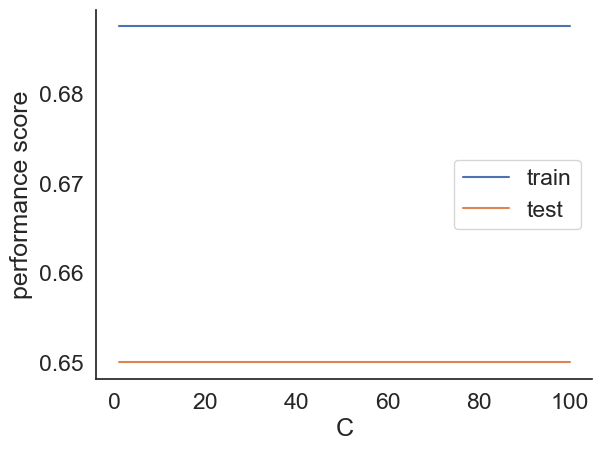

In [24]:
plt.plot(C_array,scores_train,label = 'train')
plt.plot(C_array,scores_test, label = 'test')
plt.xlabel('C')
plt.ylabel('performance score')
plt.legend()

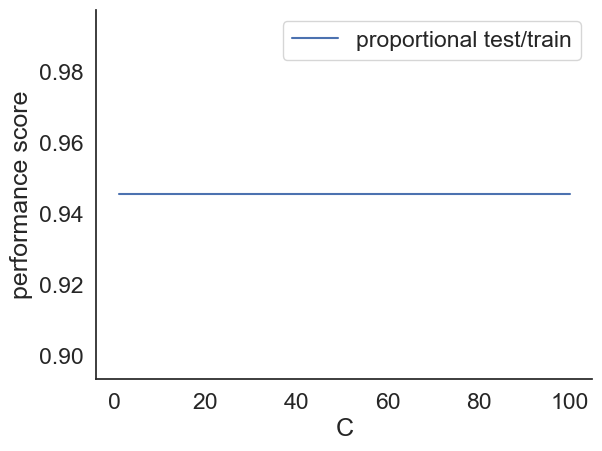

In [25]:
proportional_score  = np.array(scores_test)/np.array(scores_train)
plt.plot(C_array,proportional_score,label = 'proportional test/train')
plt.xlabel('C')
plt.ylabel('performance score')
plt.legend()

The value of the C does not seem to effect the accuracy of the measurment for a linear kernel

### Exercise 2
---
Repeat exercise 1, but using a non-linear SVM model (the sklearn class `SVC` uses [Radial Basis Functions](https://en.wikipedia.org/wiki/Radial_basis_function) as a default, check its documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)). 
To have a fairer assessment of the performance, train the model on a fraction (e.g. 80%) of the data, and test it on the other 20%.
Compare the performance of a linear SVC and a RBF SVC for dataset that are increaslingly non-linearly-separable.


In [9]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn import svm
import numpy as np
import pickle
import seaborn as sns
import sys
import os
sys.path.append(os.path.abspath("code"))
from utils import download_data
import warnings
warnings.filterwarnings('ignore')

sns.set_theme(context='notebook',style='white',font_scale=1.5,
              rc = {'axes.spines.top':False,'axes.spines.right':False})

In [10]:
#download lesson data
download_data('https://surfdrive.surf.nl/files/index.php/s/tEenLK693lU9v01')

In [11]:
from sklearn.model_selection import StratifiedKFold
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#X_train,y_train = X_nsep,y_nsep
#X_test,y_test = X_nsep_test,y_nsep_test
#increase the number of samples to make the sysem more non-linear
n_samples_array = [25,50,100,150,200,300]
scores_train_array_linear = np.empty(len(n_samples_array), dtype=object)
scores_test_array_linear = np.empty(len(n_samples_array), dtype=object)
scores_train_array_rbf = np.empty(len(n_samples_array), dtype=object)
scores_test_array_rbf = np.empty(len(n_samples_array), dtype=object)
k = 0
for n_samples_input in n_samples_array:
    
    #X_nsep,y_nsep = make_blobs(n_samples=n_samples_input,n_features =2,centers=[[-1,0.5],[1,0]],cluster_std=1.5)
    X_nsep,y_nsep = make_blobs(n_samples=n_samples_input,n_features =2,centers=[[-1,0.5],[1,0]],cluster_std=1.5)
    C_array = np.linspace(1,100,100)
    #C_array = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10]
    scores_test_linear = []
    scores_train_linear = []
    scores_test_rbf = []
    scores_train_rbf = []
    
    X_train, X_test, y_train, y_test = train_test_split(X_nsep,y_nsep, test_size=0.2, random_state=42)
    for C_input in C_array:

        clf_rbf = svm.SVC(kernel='rbf',C=C_input);
        clf_linear = svm.SVC(kernel='linear',C=C_input);
        clf_rbf.fit(X_train, y_train)
        clf_linear.fit(X_train,y_train)

        scores_test_linear.append(clf_linear.score(X_test,y_test))
        scores_train_linear.append(clf_linear.score(X_train,y_train))
        scores_test_rbf.append(clf_rbf.score(X_test,y_test))
        scores_train_rbf.append(clf_rbf.score(X_train,y_train))
    #scores_train_array[k].append(scores_test)
    scores_train_array_linear[k] = scores_train_linear
    scores_test_array_linear[k] = scores_test_linear
    scores_train_array_rbf[k] = scores_train_rbf
    scores_test_array_rbf[k] = scores_test_rbf
    k +=1

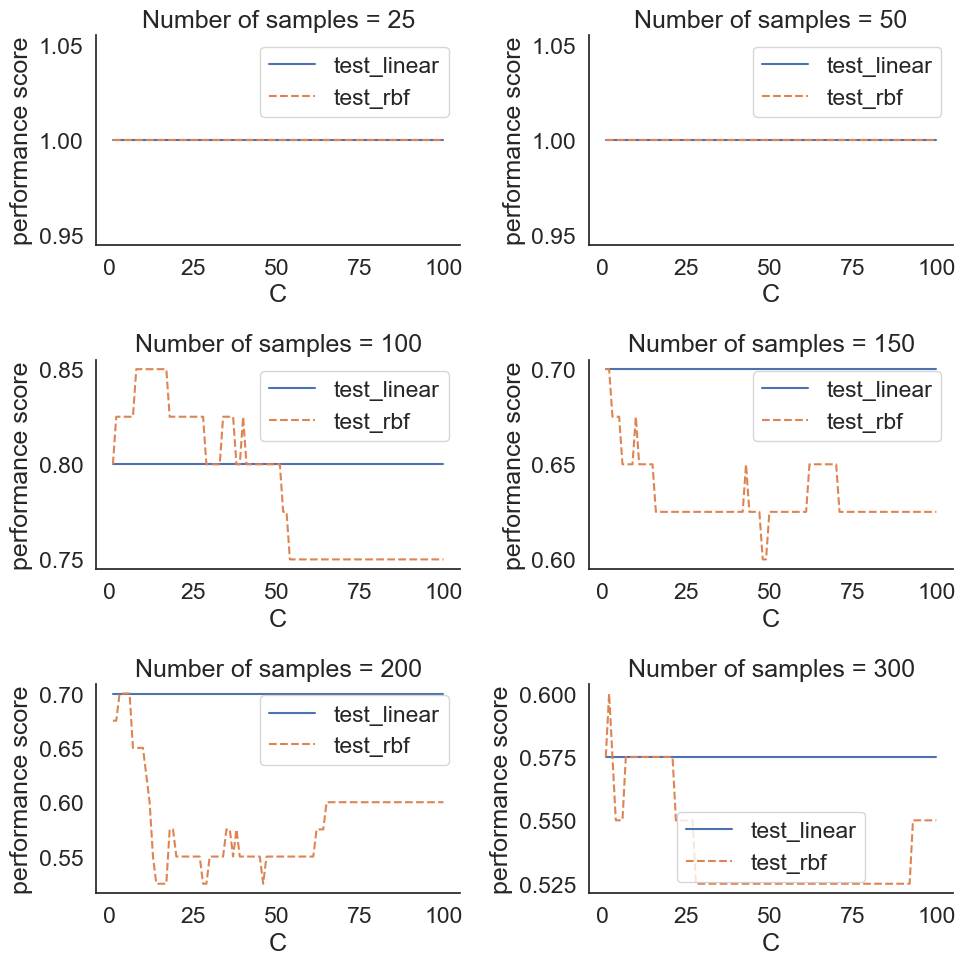

In [20]:
plt.figure(figsize=(10,10))

for i in range(len(n_samples_array)):
    plt.subplot(3,2,i+1)
    #plt.plot(C_array,scores_train_array_linear[i],label = 'train_linear')
    plt.plot(C_array,scores_test_array_linear[i], label = 'test_linear')
    #plt.plot(C_array,scores_train_array_rbf[i],label = 'train_rbf' , linestyle='dashed')
    plt.plot(C_array,scores_test_array_rbf[i], label = 'test_rbf',linestyle='dashed')
    plt.xlabel('C')
    plt.ylabel('performance score')
    plt.title(f'Number of samples = {n_samples_array[i]}')
    plt.legend()
plt.tight_layout()

The c-value does not effect the linear model but it does effect the rbf model. for the rbf model the the performance depends on the c-value but only for a higher number of samples and thus more non-linear

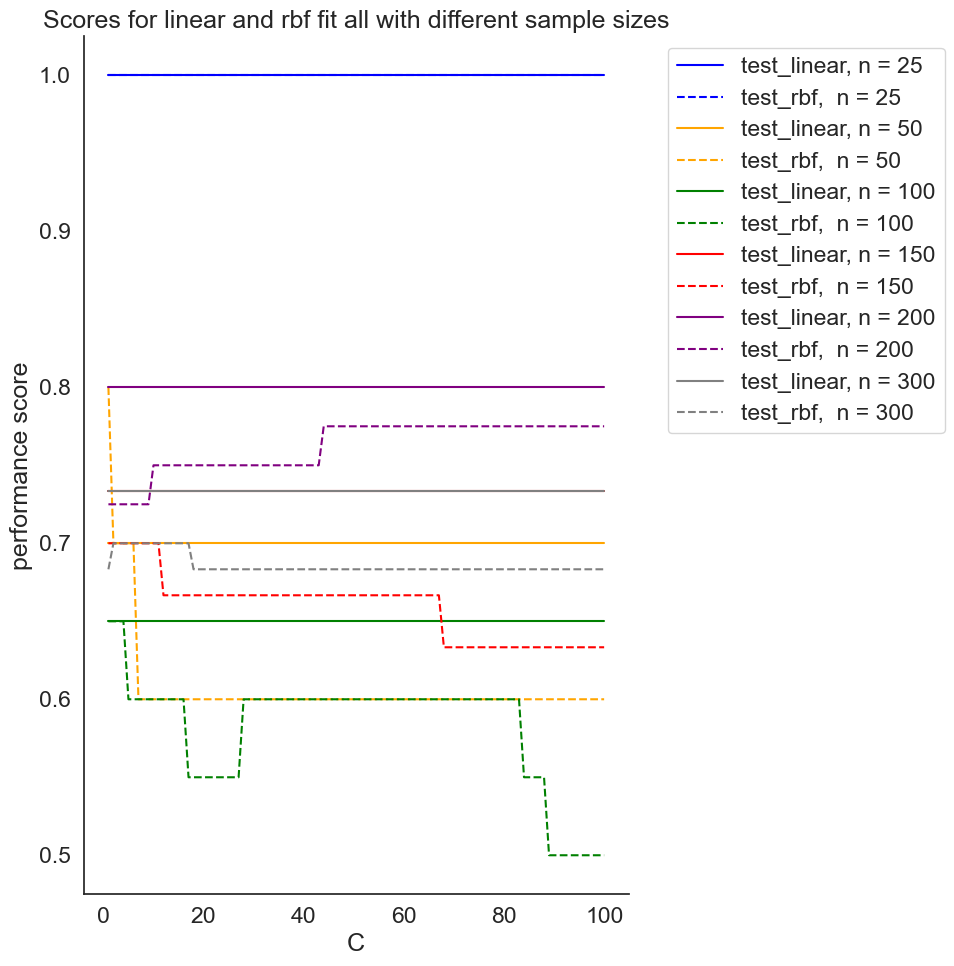

In [13]:
plt.figure(figsize=(10,10))
color= ['blue','orange', 'green', 'red', 'purple','gray', ]
for i in range(len(n_samples_array)):
    plt.plot(C_array,scores_test_array_linear[i], label = f'test_linear, n = {n_samples_array[i]}', color = color[i])
    plt.plot(C_array,scores_test_array_rbf[i], label = f'test_rbf,  n = {n_samples_array[i]}',linestyle='dashed', color = color[i])
    plt.xlabel('C')
    plt.ylabel('performance score')
    plt.title('Scores for linear and rbf fit all with different sample sizes')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
plt.tight_layout()

As we increase the sample size and thus the non-linearity the performance drops for both the linear and the rbf model. However the c-value does not influence the linear model but does influence the rbf model negatively. The linear model has a better performance for all sample sizes.

In [21]:
from sklearn.model_selection import StratifiedKFold
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Icrease the cluster size standard deviation to increase the non-linearity

cluster_std= [0.2,0.5,1,1.5,2,2.5]
scores_train_array_linear = np.empty(len(n_samples_array), dtype=object)
scores_test_array_linear = np.empty(len(n_samples_array), dtype=object)
scores_train_array_rbf = np.empty(len(n_samples_array), dtype=object)
scores_test_array_rbf = np.empty(len(n_samples_array), dtype=object)
k = 0
for cluster_std_input in cluster_std:
    
    #X_nsep,y_nsep = make_blobs(n_samples=n_samples_input,n_features =2,centers=[[-1,0.5],[1,0]],cluster_std=1.5)
    X_nsep,y_nsep = make_blobs(n_samples=200,n_features =2,centers=[[-1,0.5],[1,0]],cluster_std=cluster_std_input)
    C_array = np.linspace(1,100,100)
    #C_array = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10]
    scores_test_linear = []
    scores_train_linear = []
    scores_test_rbf = []
    scores_train_rbf = []
    
    X_train, X_test, y_train, y_test = train_test_split(X_nsep,y_nsep, test_size=0.2, random_state=42)
    for C_input in C_array:

        clf_rbf = svm.SVC(kernel='rbf',C=C_input);
        clf_linear = svm.SVC(kernel='linear',C=C_input);
        clf_rbf.fit(X_train, y_train)
        clf_linear.fit(X_train,y_train)

        scores_test_linear.append(clf_linear.score(X_test,y_test))
        scores_train_linear.append(clf_linear.score(X_train,y_train))
        scores_test_rbf.append(clf_rbf.score(X_test,y_test))
        scores_train_rbf.append(clf_rbf.score(X_train,y_train))
    #scores_train_array[k].append(scores_test)
    scores_train_array_linear[k] = scores_train_linear
    scores_test_array_linear[k] = scores_test_linear
    scores_train_array_rbf[k] = scores_train_rbf
    scores_test_array_rbf[k] = scores_test_rbf
    k +=1
    print(k)

1
2
3
4
5
6


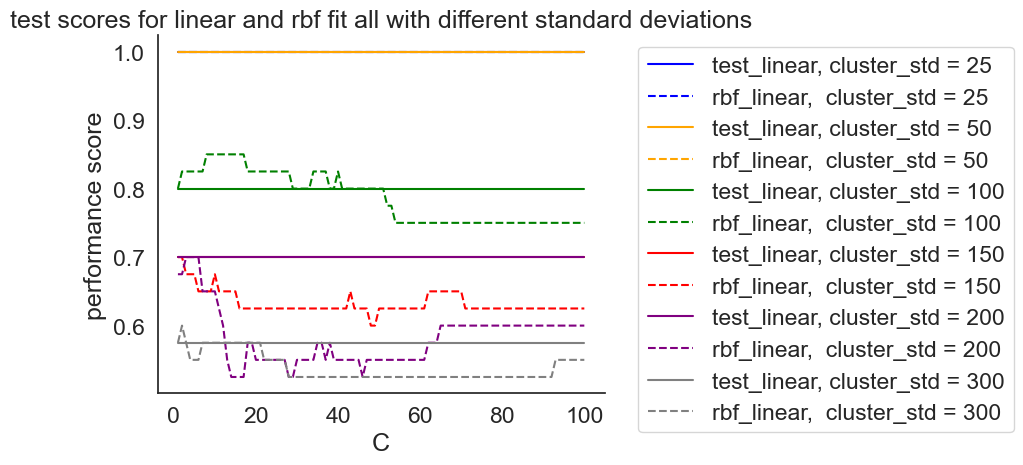

In [15]:
plt.figure(figsize=(10,5))
color= ['blue','orange', 'green', 'red', 'purple','gray', ]

for i in range(len(n_samples_array)):
    plt.plot(C_array,scores_test_array_linear[i], label = f'test_linear, cluster_std = {n_samples_array[i]}', color = color[i])
    plt.plot(C_array,scores_test_array_rbf[i], label = f'rbf_linear,  cluster_std = {n_samples_array[i]}',linestyle='dashed', color = color[i])
    plt.xlabel('C')
    plt.ylabel('performance score')
    plt.title('test scores for linear and rbf fit all with different standard deviations')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
plt.tight_layout()

As we increase the standard deviation in the cluster size and thus the non-linearity, the performance for the linear and the rbf model drops. But for the rbf model the performance also depends on the c-value. The linear model performace better for  nearly all std. But not for a standard deviation of 100.

### Exercise 3
---
Use the code below to simulate new data.
Generate data and then decode the stimulus identity, see how the decoding performance change when you change the following:

- The amplitude of the noise in the firing rate
- The amplitude of the stimulus modulation of the firing rate
- The number of neurons

Plot and comment.

## Useful code
---


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [17]:
n_cells = 20; # number of cells to simulate
n_stim_type = 2; # number of different stimuli
sigma_stim = 0.5 # amplitude of stimulus related modulation
average_firing_rate = 5; # average firing rate across the population

# generate baseline rates from exponential distirbution
cell_rate_baseline = np.random.exponential(average_firing_rate,size=n_cells)

# create stimulus average responses, perturbing the population firng rate profile
# we use a multiplicative modulation in opposite directions for the two stimuli
modulation = sigma_stim*np.random.normal(0,1,size=n_cells)
cell_rate_stim = {1: cell_rate_baseline * (1+modulation),2:cell_rate_baseline * (1-modulation)}
# sets negative firng rate to 0
cell_rate_stim[1][cell_rate_stim[1]<0]=0
cell_rate_stim[2][cell_rate_stim[2]<0]=0

In [18]:
# simulate spiking activity

s_rate = 10000 # the sampling rate of our emulated recording system
noise_rate = 1 # we are going to add some spike noise non related to the task
n_stim = 100 # number of stimuli

stim_dur = 2 #stimulus duration (in seconds)
is_interval = 3 # interval between stimuli  (in seconds)

stim_onsets = np.arange(0,n_stim*(stim_dur+is_interval),(stim_dur+is_interval)) # onset time of each stimulus (in seconds)
stim_type = np.asarray([1 for i in range(int(n_stim/2))]+[2 for i in range(int(n_stim/2))]) # identity of each stimulus
np.random.shuffle(stim_type)

time = np.arange(0,(n_stim+1)*(stim_dur+is_interval),1.0/s_rate) # vector of the sampled times.

spike_times = []
for cell in range(n_cells):
    spikes = np.random.poisson(cell_rate_baseline[cell]/s_rate,size=time.shape)
    for i,stimulus in enumerate(stim_type):
        stim_idxs = np.arange(stim_onsets[i]*s_rate,(stim_onsets[i]+stim_dur)*s_rate)
        spikes[stim_idxs] = np.random.poisson(cell_rate_stim[stimulus][cell]/s_rate,size=stim_idxs.shape)

    spike_times.append(time[spikes>0])



In [19]:
# save ouput
out_dict = {'spike_times':spike_times,
            'stim_onsets':stim_onsets,
            'stim_type':stim_type,
            'stim_duration':stim_dur
            }

with open('data/simulated_data1.pickle', 'wb') as handle:
    pickle.dump(out_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
